<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/S5_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Cargar el conjunto de datos wine
wine = load_wine()

In [3]:
# Crear un DataFrame con los datos
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [5]:
# Función para calcular la MAD (Mean Absolute Deviation)
def mad(data):
    return np.mean(np.abs(data - np.mean(data)))

In [6]:
# Calcular estadísticas
statistics = {
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0],  # La moda puede tener múltiples valores, seleccionamos el primero
    'Standard Deviation': df.std(),
    'Variance': df.var(),
    'MAD': df.apply(mad)
}


In [7]:
# Convertir las estadísticas en un DataFrame
statistics_df = pd.DataFrame(statistics)
print(statistics_df)

                                    Mean   Median    Mode  Standard Deviation  \
alcohol                        13.000618   13.050   12.37            0.811827   
malic_acid                      2.336348    1.865    1.73            1.117146   
ash                             2.366517    2.360    2.28            0.274344   
alcalinity_of_ash              19.494944   19.500   20.00            3.339564   
magnesium                      99.741573   98.000   88.00           14.282484   
total_phenols                   2.295112    2.355    2.20            0.625851   
flavanoids                      2.029270    2.135    2.65            0.998859   
nonflavanoid_phenols            0.361854    0.340    0.26            0.124453   
proanthocyanins                 1.590899    1.555    1.35            0.572359   
color_intensity                 5.058090    4.690    2.60            2.318286   
hue                             0.957449    0.965    1.04            0.228572   
od280/od315_of_diluted_wines

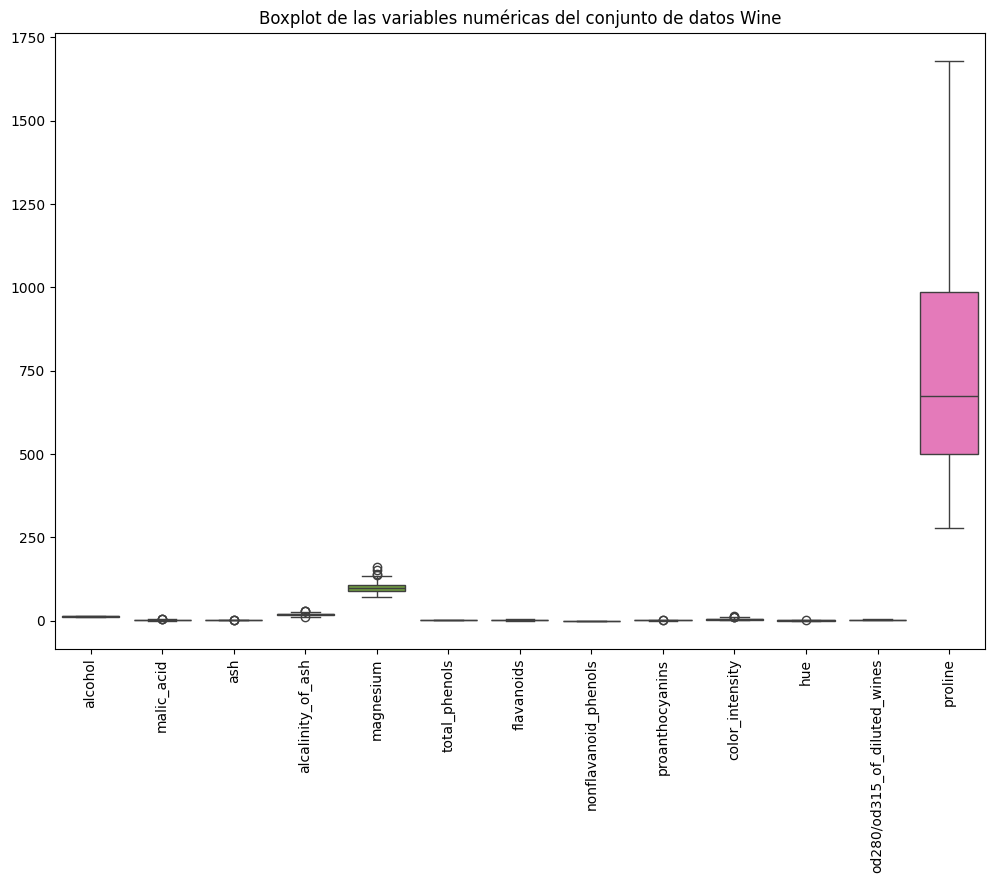

In [8]:
# Gráficas de boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :-1])  # Excluimos la columna 'target'
plt.xticks(rotation=90)
plt.title('Boxplot de las variables numéricas del conjunto de datos Wine')
plt.show()

In [9]:
# Descripción básica del DataFrame
description = df.describe()

# Mostrar la descripción
print(description)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [10]:
# Verificar si hay datos faltantes
missing_data = df.isnull().sum()

# Mostrar los resultados
print("Datos faltantes por columna:")
print(missing_data)

Datos faltantes por columna:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


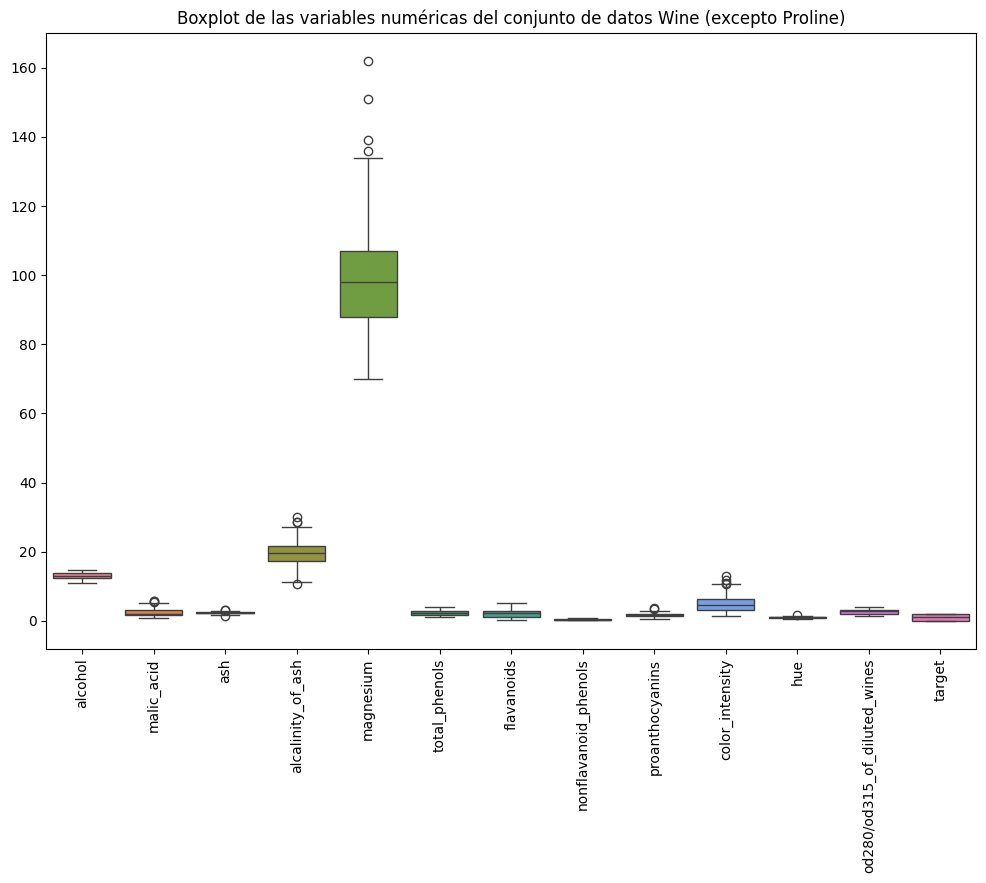

In [11]:
# Excluir la columna 'Proline'
df_excluding_proline = df.drop(columns=['proline'])

# Gráficas de boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_excluding_proline)
plt.xticks(rotation=90)
plt.title('Boxplot de las variables numéricas del conjunto de datos Wine (excepto Proline)')
plt.show()

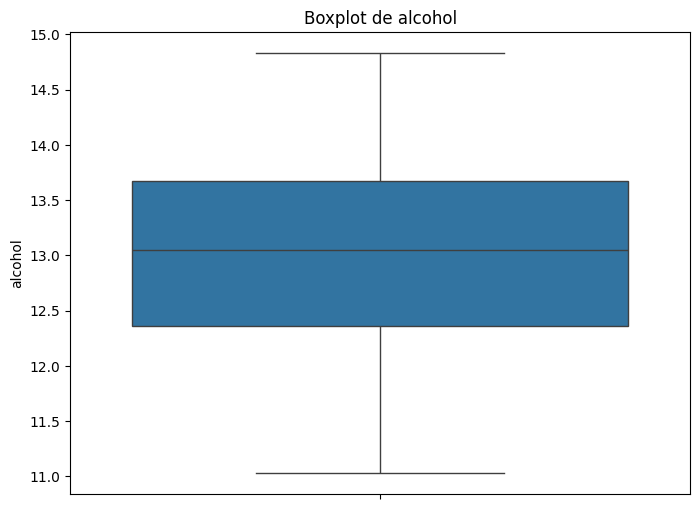

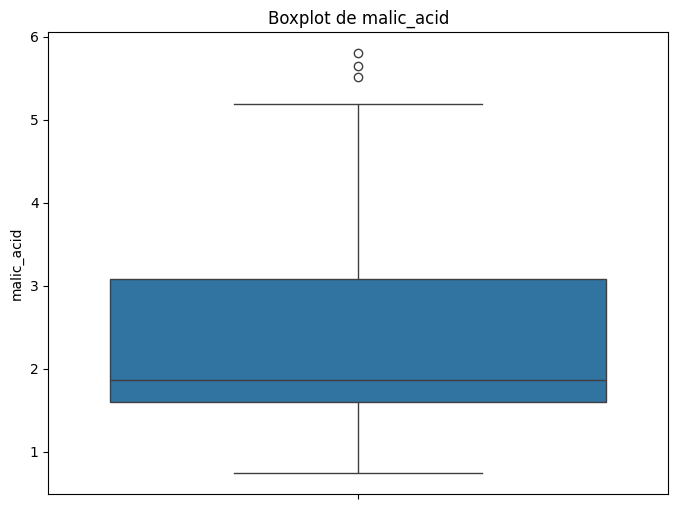

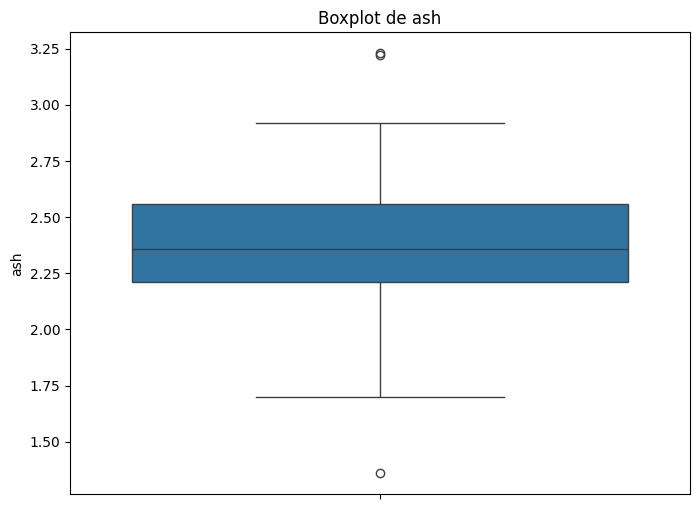

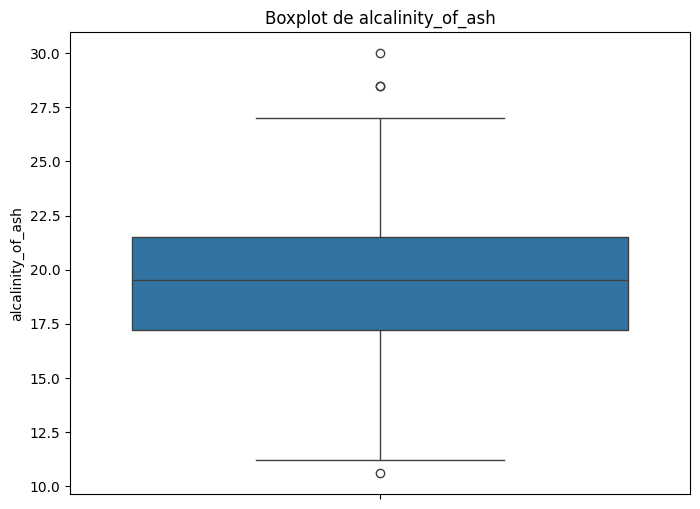

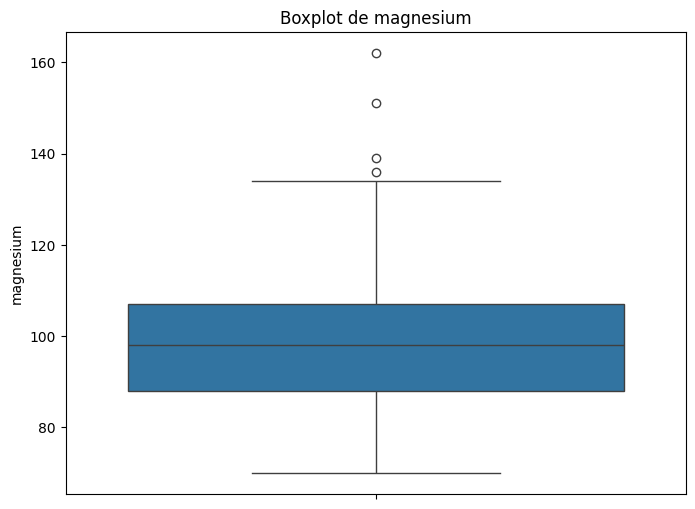

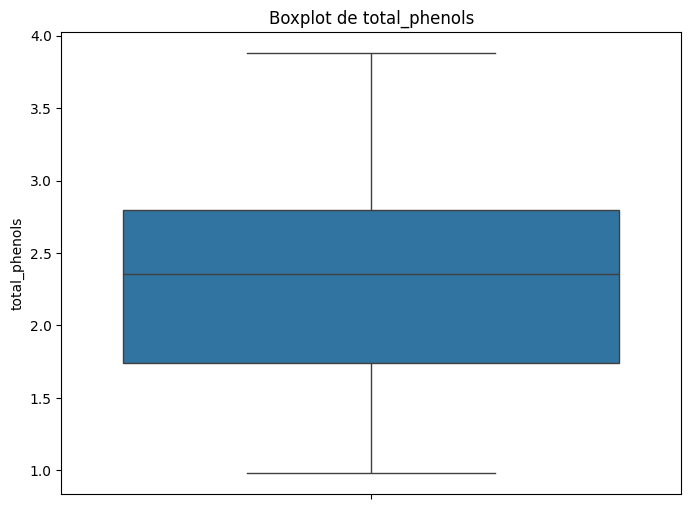

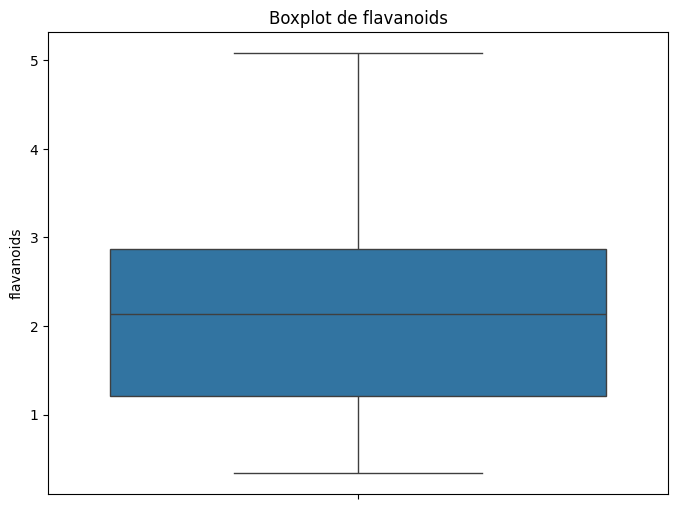

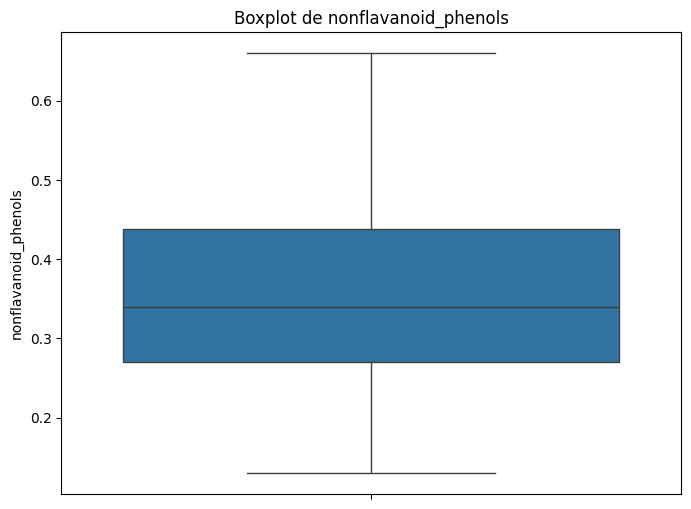

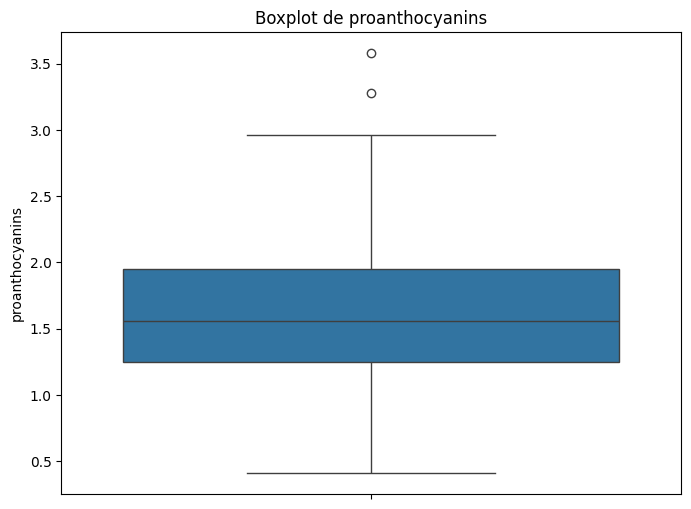

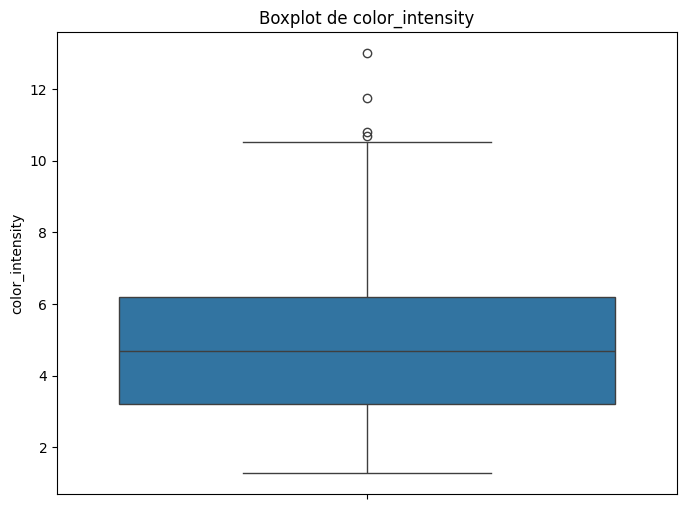

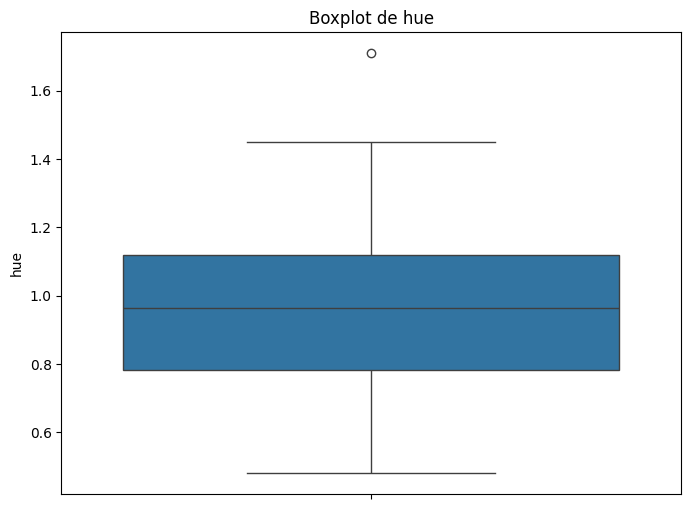

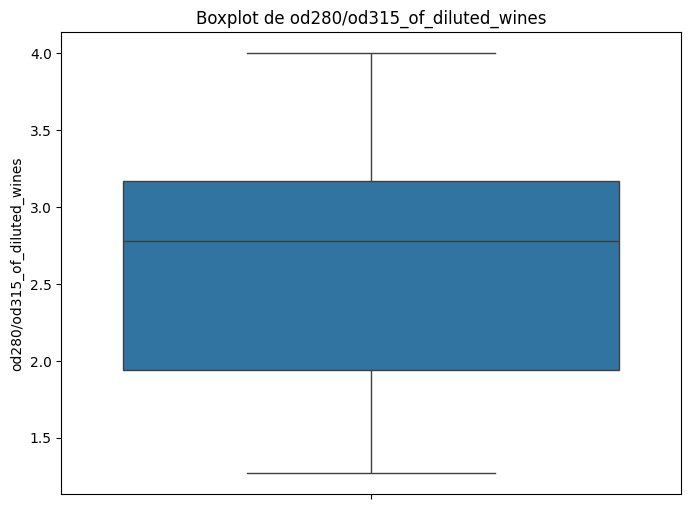

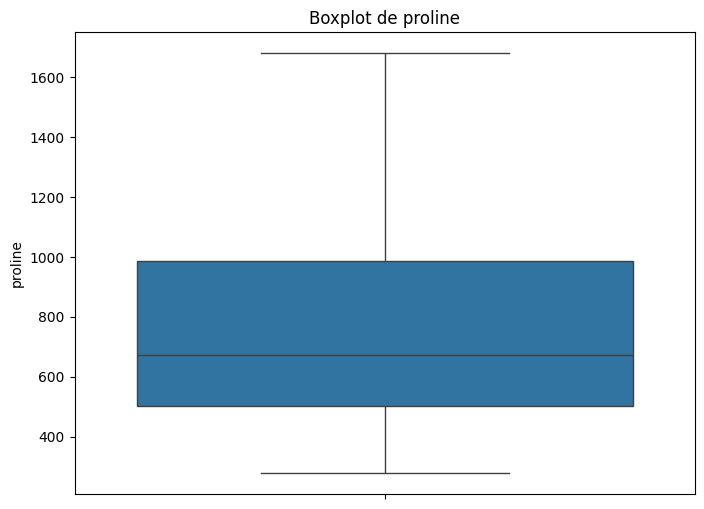

In [12]:
# Generar un boxplot para cada variable numérica
for column in df.columns[:-1]:  # Excluir la columna 'target'
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

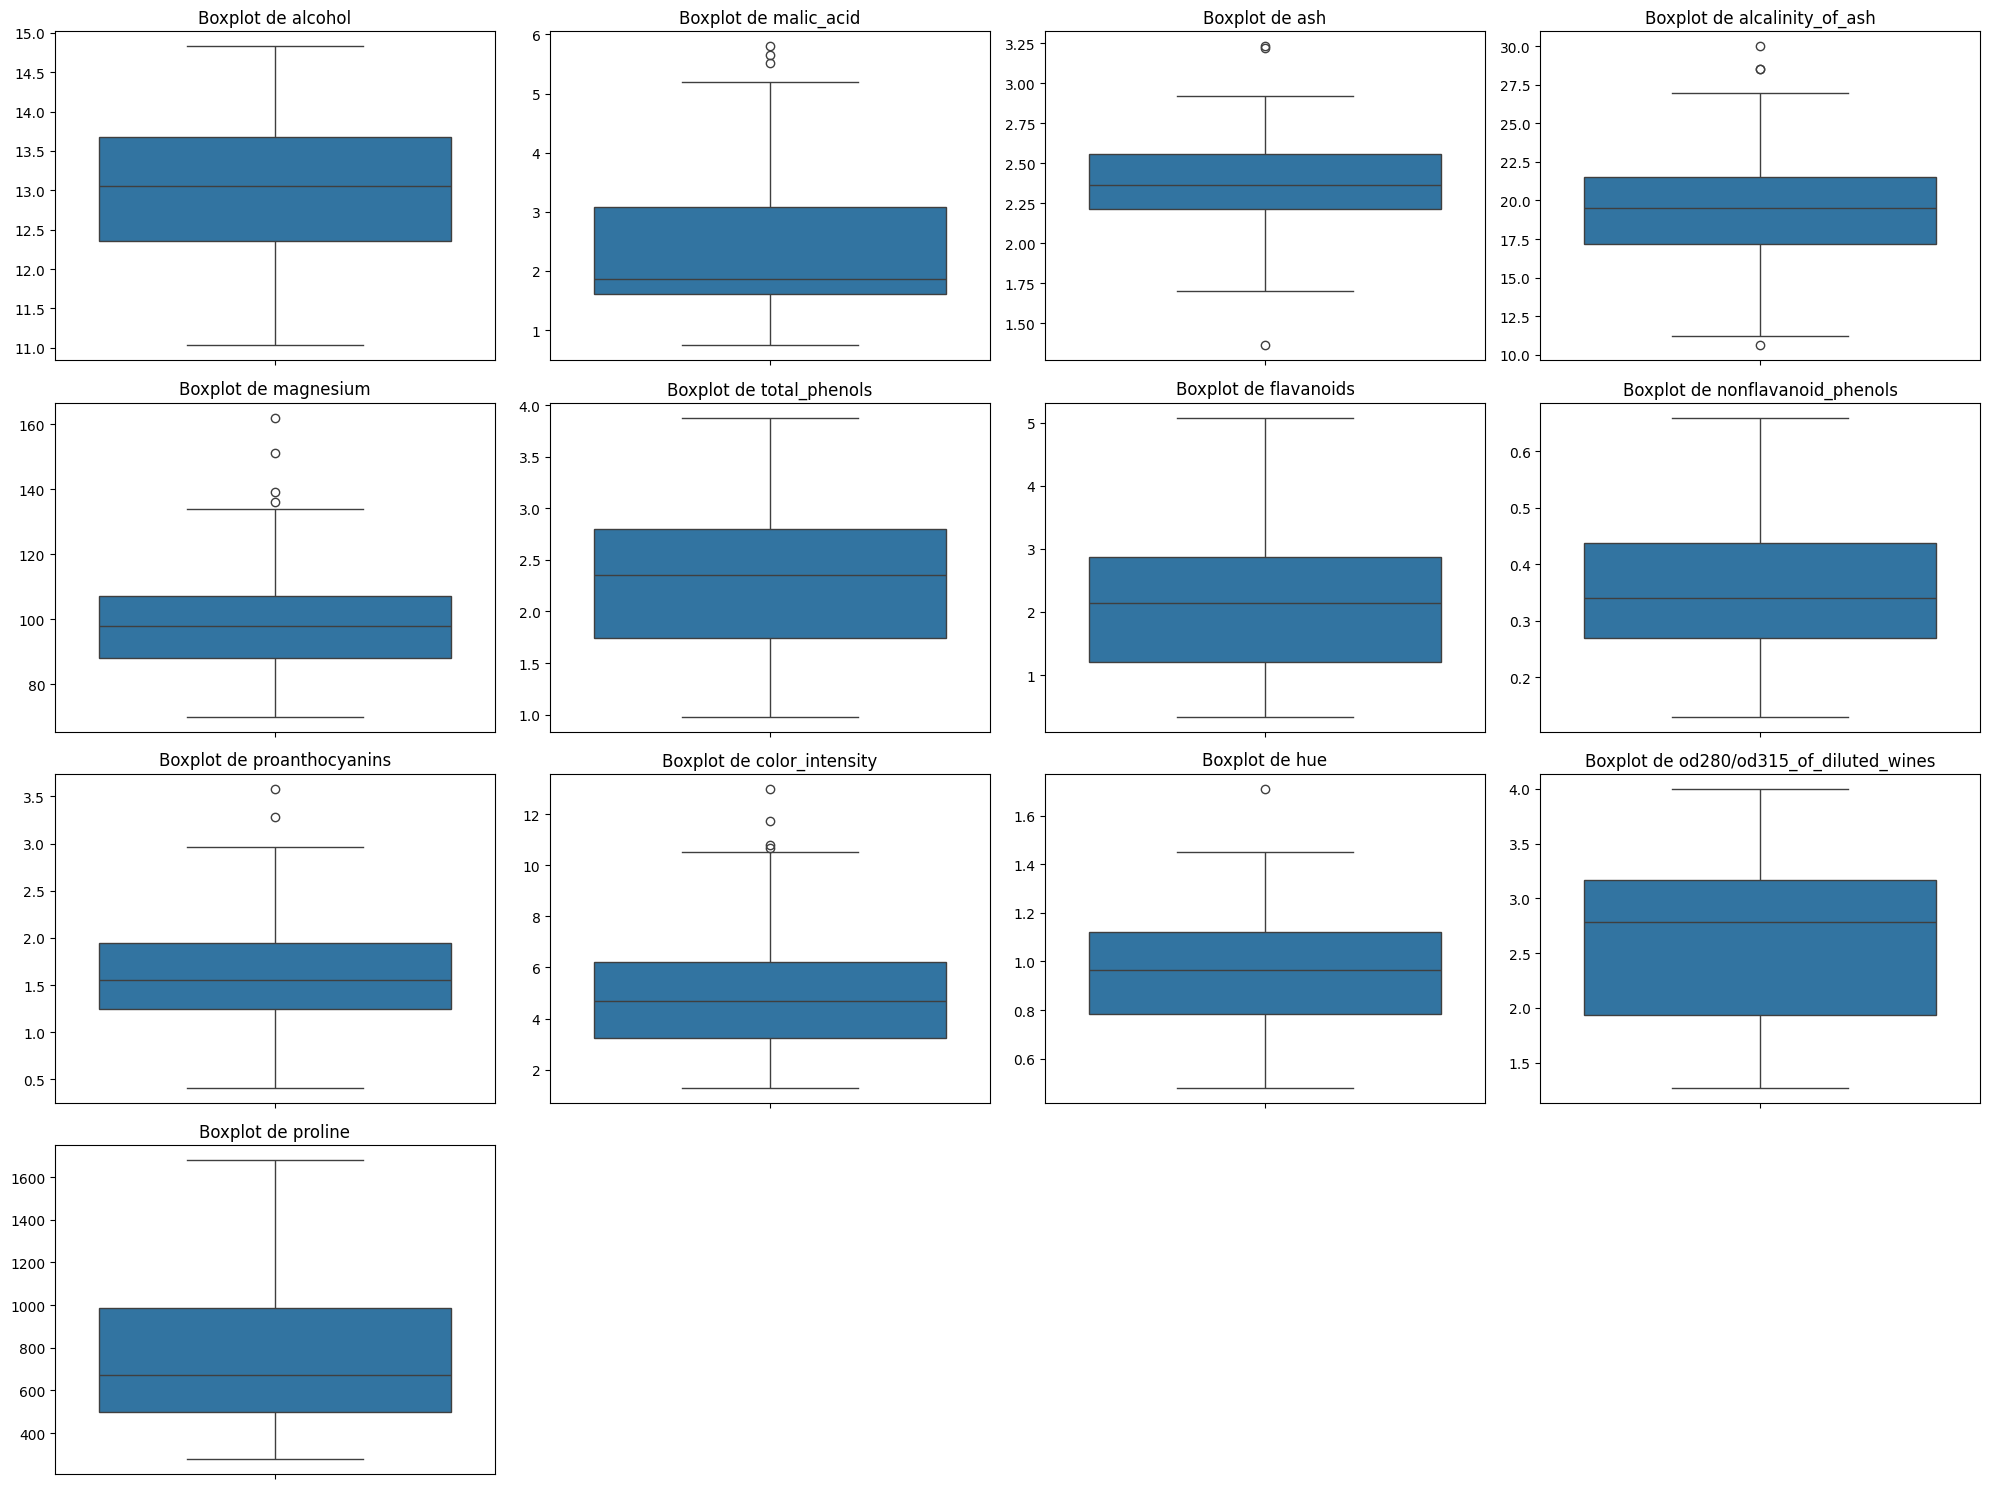

In [13]:
# Número de columnas para las subplots
num_cols = 4

# Calcular el número de filas necesarias
num_rows = (len(df.columns) - 1 + num_cols - 1) // num_cols

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Generar un boxplot para cada variable numérica
for i, column in enumerate(df.columns[:-1]):  # Excluir la columna 'target'
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos
for i in range(len(df.columns) - 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos wine
wine = load_wine()


In [3]:
# Crear un DataFrame con los datos
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target


In [4]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")


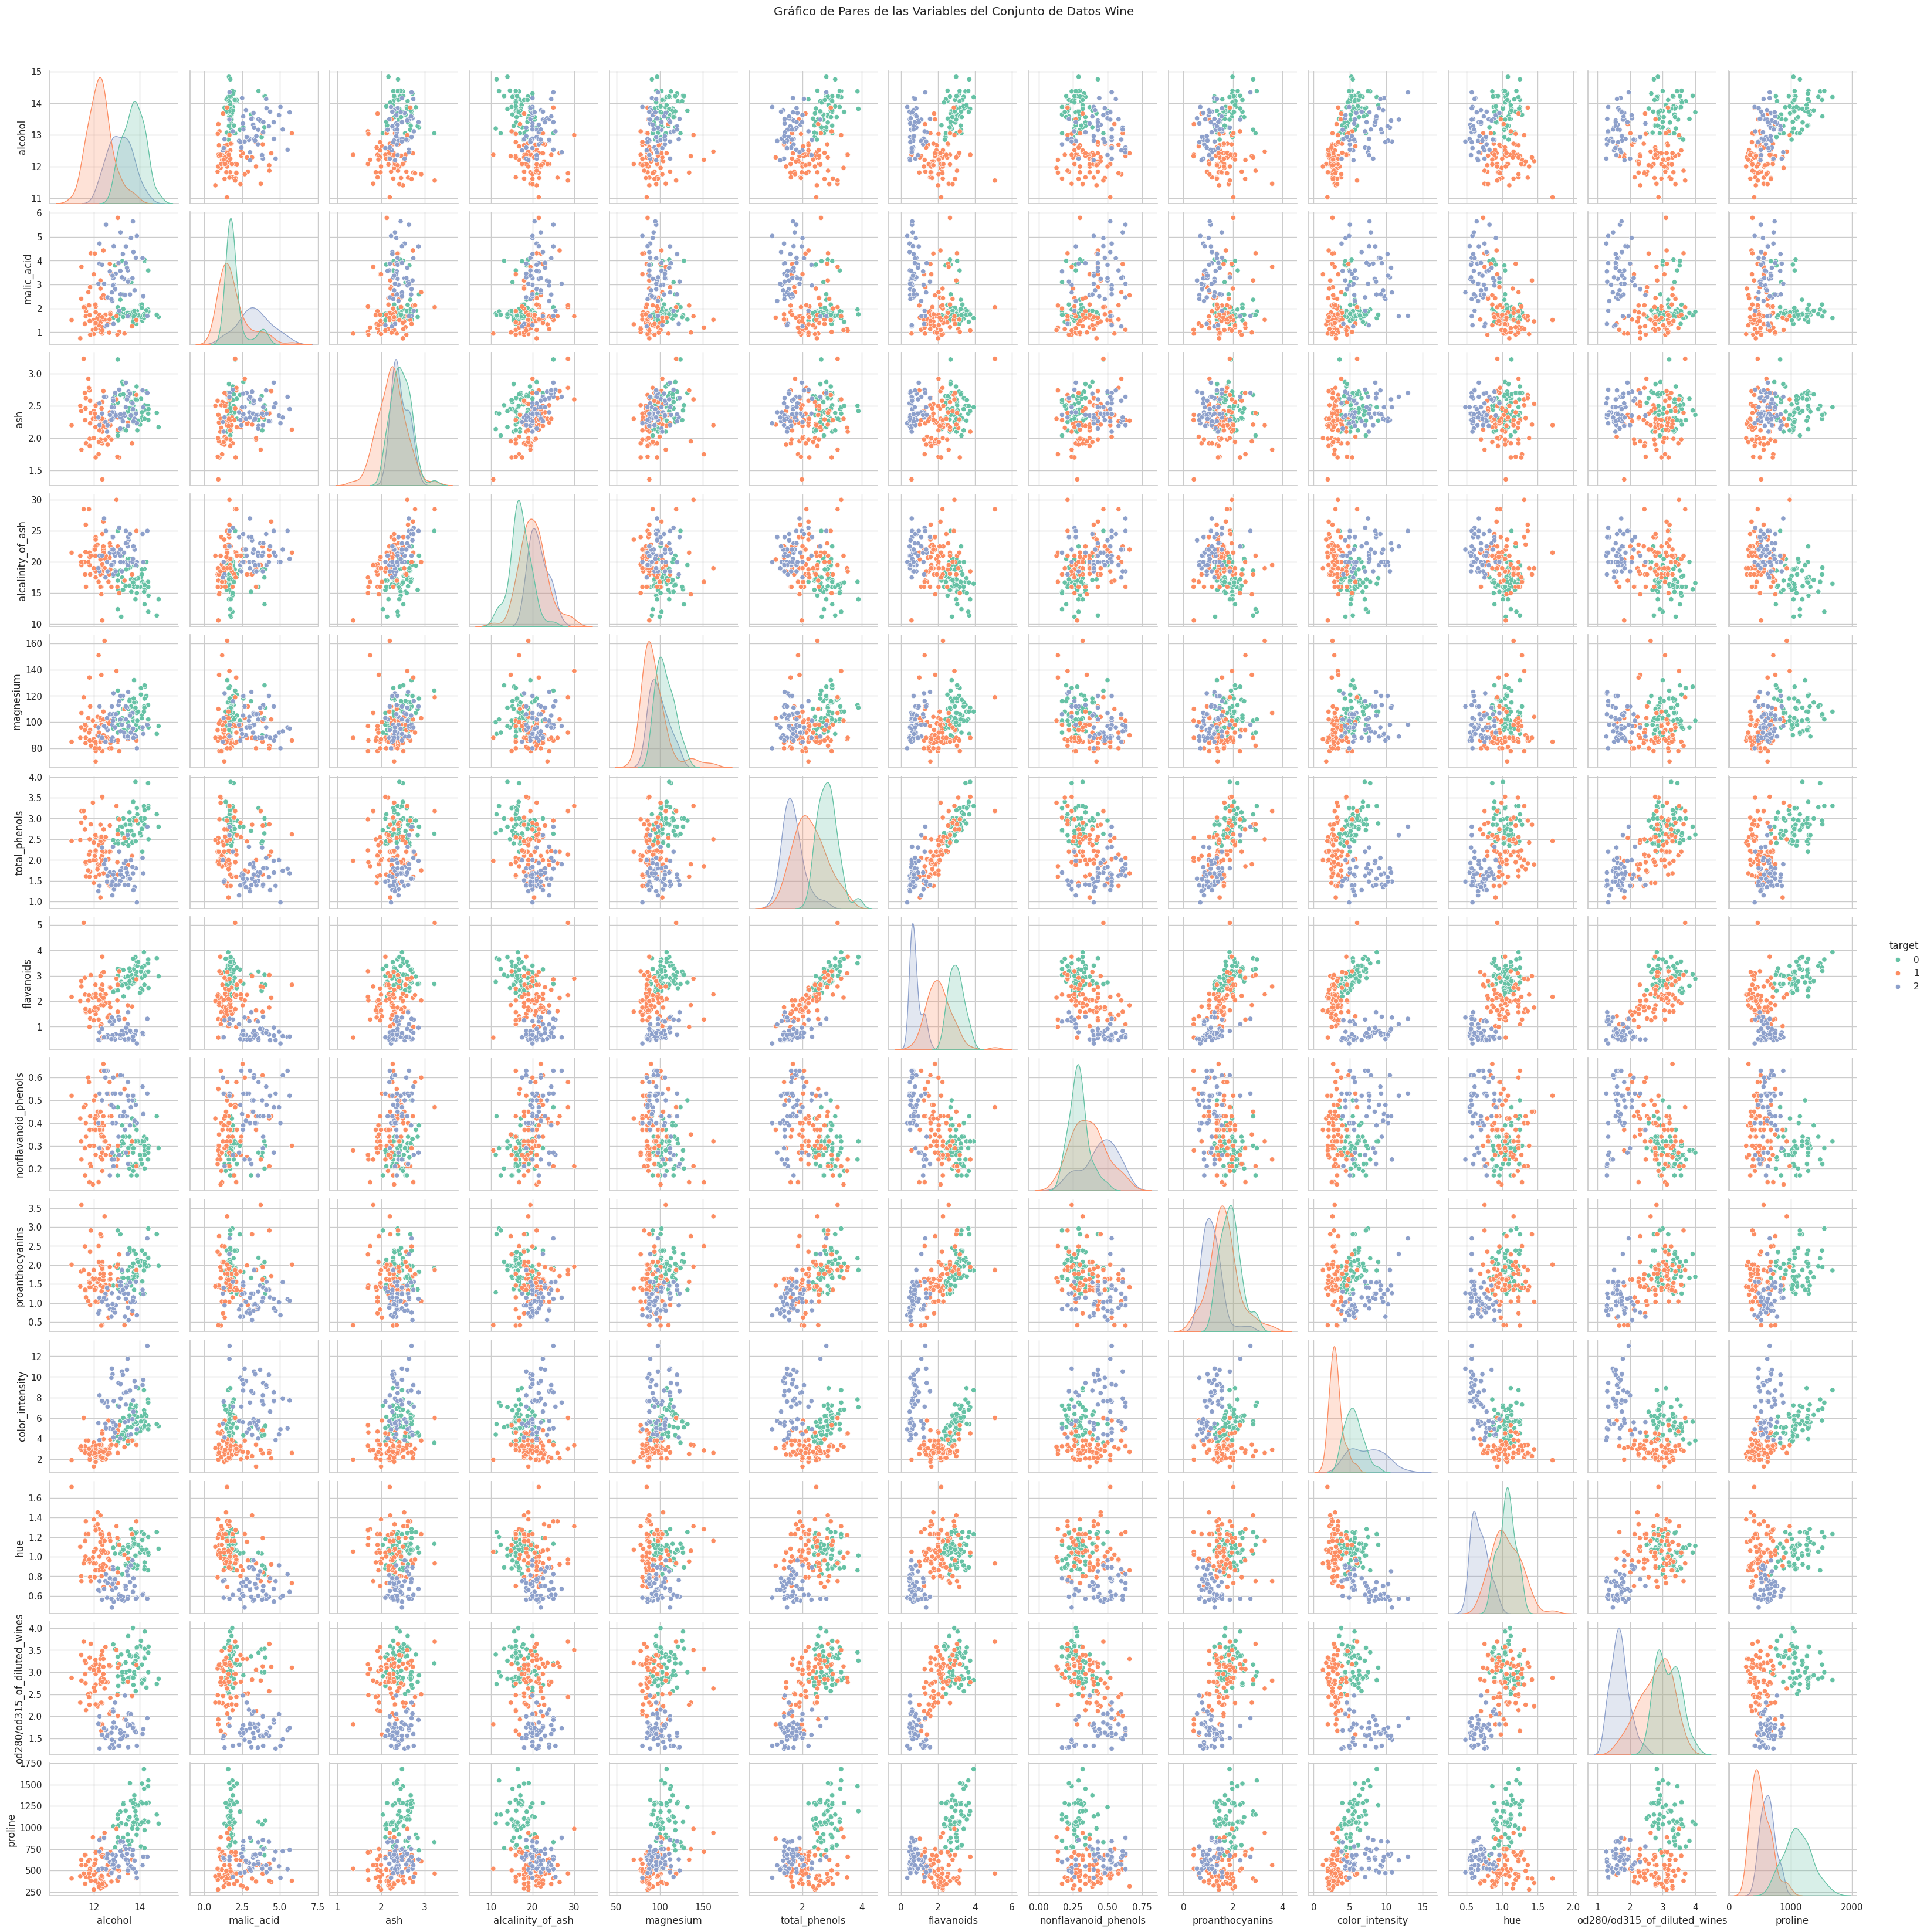

In [5]:
# Crear un gráfico de pares (pair plot) con diferentes colores para cada clase de vino
pair_plot = sns.pairplot(df, hue='target', palette='Set2')
pair_plot.fig.suptitle("Gráfico de Pares de las Variables del Conjunto de Datos Wine", y=1.02)
plt.show()

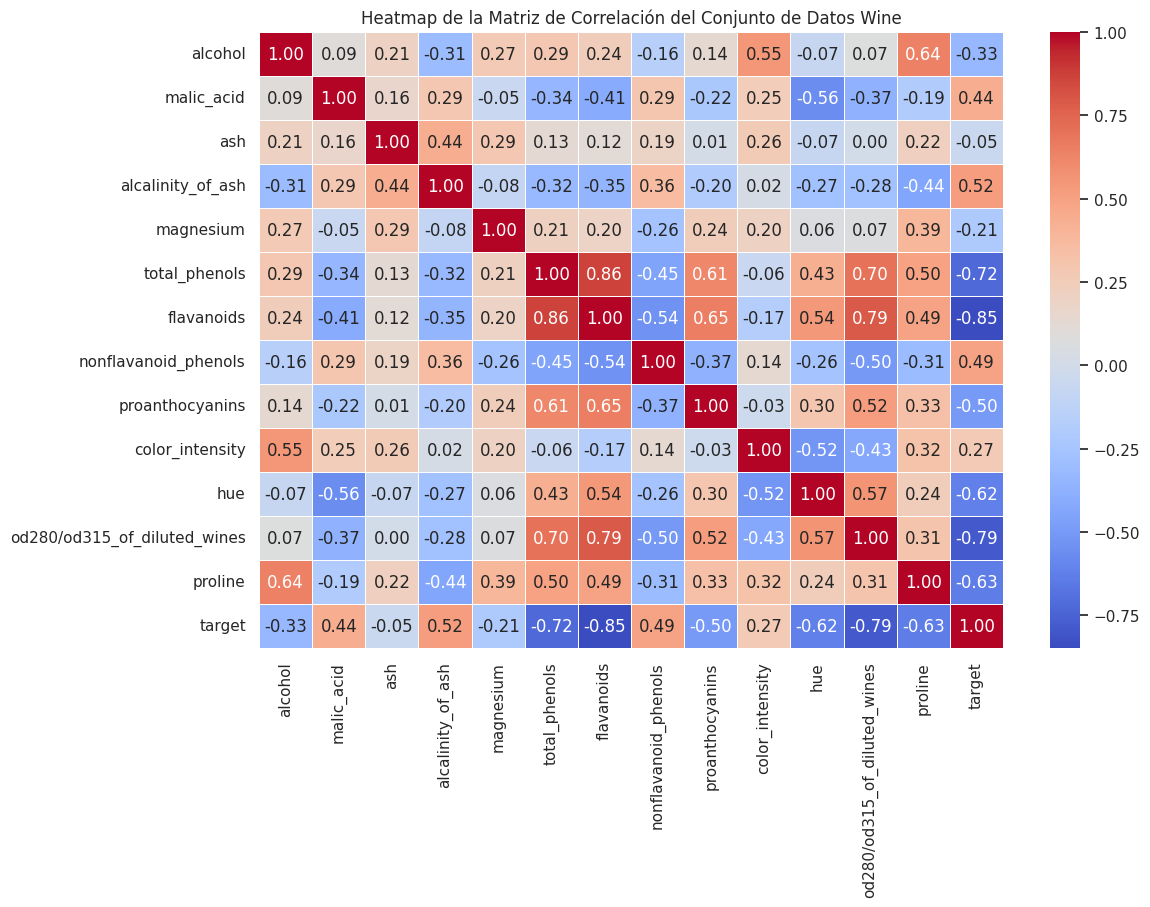

In [6]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear un heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap de la Matriz de Correlación del Conjunto de Datos Wine')
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos wine
wine = load_wine()


In [3]:
# Crear un DataFrame con los datos
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

Variable: alcohol
Estadístico de Shapiro-Wilk: 0.9818041416927711, p-valor: 0.020047981728854945
La variable alcohol no sigue una distribución normal (p <= 0.05)



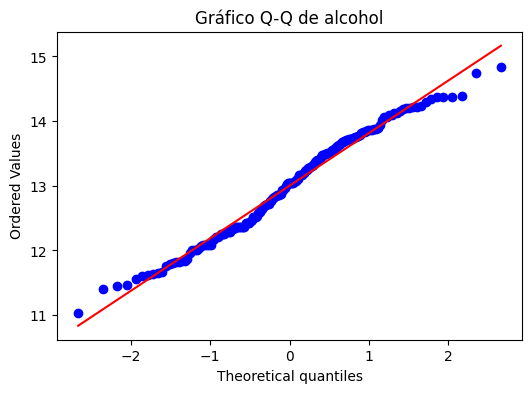

Variable: malic_acid
Estadístico de Shapiro-Wilk: 0.8887839752895415, p-valor: 2.945800703600761e-10
La variable malic_acid no sigue una distribución normal (p <= 0.05)



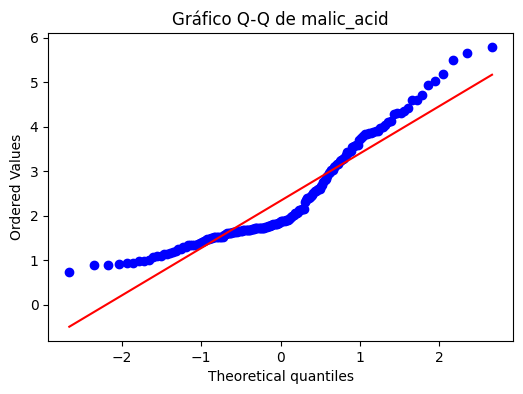

Variable: ash
Estadístico de Shapiro-Wilk: 0.9839469382497583, p-valor: 0.0386827755407432
La variable ash no sigue una distribución normal (p <= 0.05)



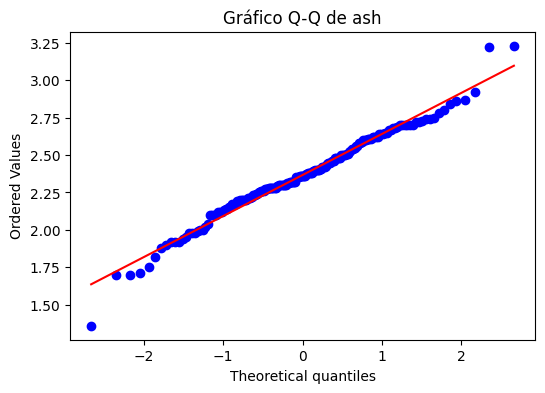

Variable: alcalinity_of_ash
Estadístico de Shapiro-Wilk: 0.9902253552856983, p-valor: 0.263868844753376
La variable alcalinity_of_ash parece seguir una distribución normal (p > 0.05)



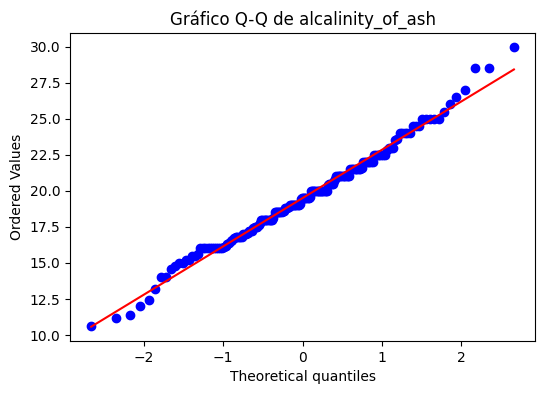

Variable: magnesium
Estadístico de Shapiro-Wilk: 0.9383312109016513, p-valor: 6.345693783266514e-07
La variable magnesium no sigue una distribución normal (p <= 0.05)



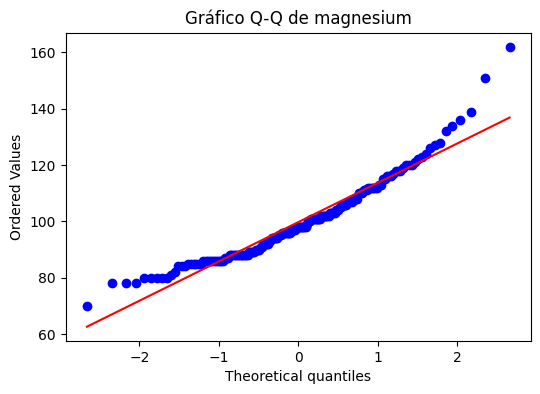

Variable: total_phenols
Estadístico de Shapiro-Wilk: 0.9766817428672644, p-valor: 0.004395305154289821
La variable total_phenols no sigue una distribución normal (p <= 0.05)



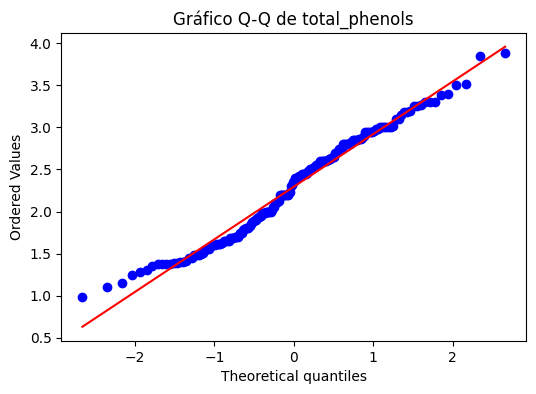

Variable: flavanoids
Estadístico de Shapiro-Wilk: 0.9545261281841189, p-valor: 1.6788526899512583e-05
La variable flavanoids no sigue una distribución normal (p <= 0.05)



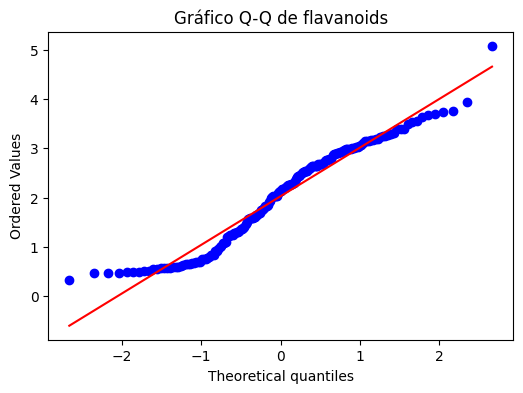

Variable: nonflavanoid_phenols
Estadístico de Shapiro-Wilk: 0.9625217036845527, p-valor: 0.00010550998382693621
La variable nonflavanoid_phenols no sigue una distribución normal (p <= 0.05)



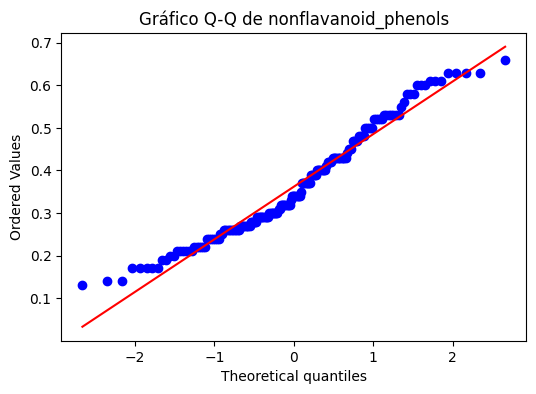

Variable: proanthocyanins
Estadístico de Shapiro-Wilk: 0.9807233134328748, p-valor: 0.01445402508124036
La variable proanthocyanins no sigue una distribución normal (p <= 0.05)



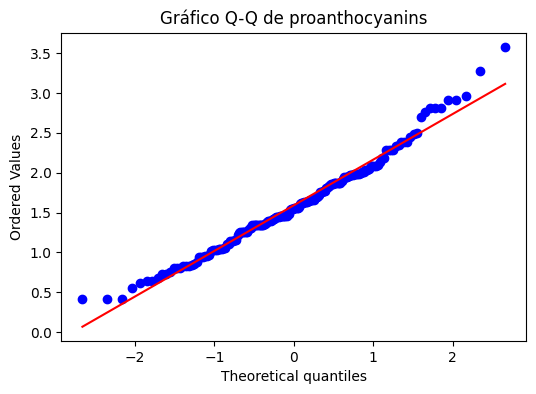

Variable: color_intensity
Estadístico de Shapiro-Wilk: 0.9403184358731959, p-valor: 9.22920982432373e-07
La variable color_intensity no sigue una distribución normal (p <= 0.05)



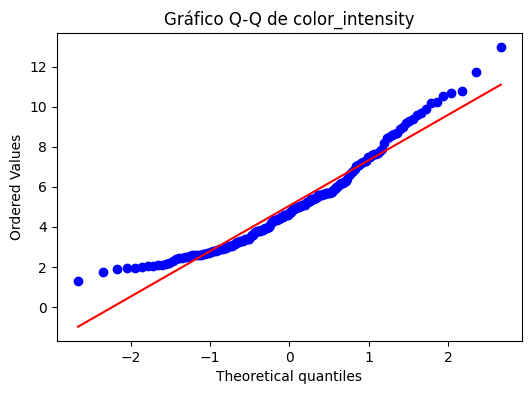

Variable: hue
Estadístico de Shapiro-Wilk: 0.9813423238340274, p-valor: 0.0174254960963155
La variable hue no sigue una distribución normal (p <= 0.05)



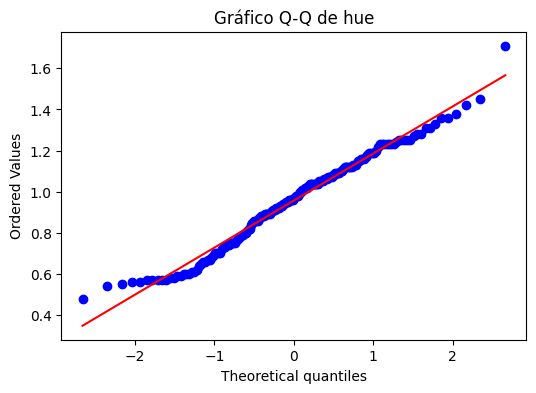

Variable: od280/od315_of_diluted_wines
Estadístico de Shapiro-Wilk: 0.9450473412846935, p-valor: 2.3160643202009424e-06
La variable od280/od315_of_diluted_wines no sigue una distribución normal (p <= 0.05)



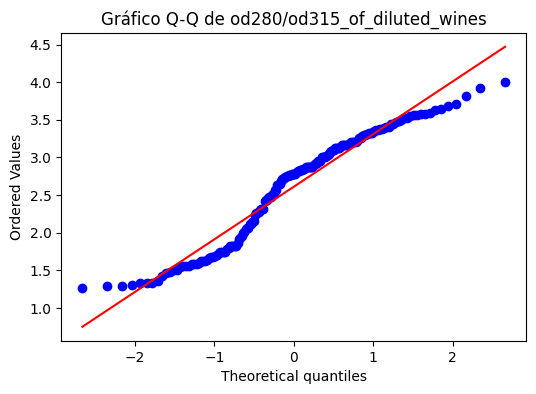

Variable: proline
Estadístico de Shapiro-Wilk: 0.9311862715126878, p-valor: 1.7412596552643282e-07
La variable proline no sigue una distribución normal (p <= 0.05)



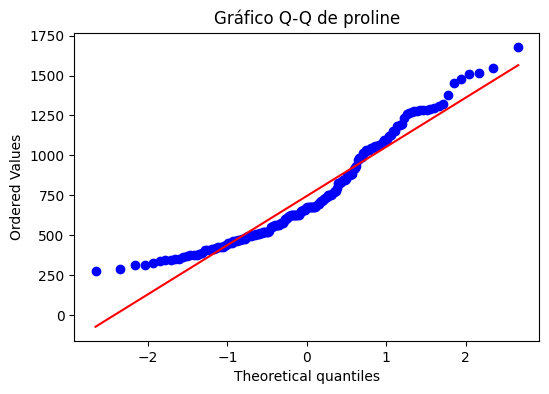

In [4]:
# Prueba de Shapiro-Wilk y gráficos Q-Q
for column in df.columns[:-1]:  # Excluir la columna 'target'
    # Prueba de Shapiro-Wilk
    stat, p_value = stats.shapiro(df[column])
    print(f'Variable: {column}')
    print(f'Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}')
    if p_value > 0.05:
        print(f'La variable {column} parece seguir una distribución normal (p > 0.05)')
    else:
        print(f'La variable {column} no sigue una distribución normal (p <= 0.05)')
    print()

    # Gráfico Q-Q
    plt.figure(figsize=(6, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {column}')
    plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Cargar el conjunto de datos wine
wine = load_wine()


In [3]:
# Crear un DataFrame con los datos
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target


In [4]:
# Realizar ANOVA de una vía para cada variable numérica
for column in df.columns[:-1]:  # Excluir la columna 'target'
    model = ols(f'{column} ~ C(target)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA para {column}')
    print(anova_table)
    print('\n')

ANOVA para alcohol
              sum_sq     df           F        PR(>F)
C(target)  70.794850    2.0  135.077624  3.319504e-36
Residual   45.859182  175.0         NaN           NaN


ANOVA para malic_acid
               sum_sq     df          F        PR(>F)
C(target)   65.578037    2.0  36.943425  4.127229e-14
Residual   155.320689  175.0        NaN           NaN


ANOVA para ash
              sum_sq     df          F    PR(>F)
C(target)   1.759223    2.0  13.312901  0.000004
Residual   11.562618  175.0        NaN       NaN


ANOVA para alcalinity_of_ash
                sum_sq     df          F        PR(>F)
C(target)   572.833493    2.0  35.771637  9.444473e-14
Residual   1401.191957  175.0        NaN           NaN


ANOVA para magnesium
                 sum_sq     df          F    PR(>F)
C(target)   4491.002056    2.0  12.429584  0.000009
Residual   31615.110304  175.0        NaN       NaN


ANOVA para total_phenols
              sum_sq     df         F        PR(>F)
C(target)  35.8

PatsyError: Error evaluating factor: NameError: name 'od280' is not defined
    od280/od315_of_diluted_wines ~ C(target)
    ^^^^^

In [5]:
import pandas as pd
from sklearn.datasets import load_wine
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# Cargar el conjunto de datos wine
wine = load_wine()

# Crear un DataFrame con los datos
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Lista para almacenar los resultados
results = []

# Realizar ANOVA de una vía para cada variable numérica
for column in df.columns[:-1]:  # Excluir la columna 'target'
    model = ols(f'Q("{column}") ~ C(target)', data=df).fit()  # Q() para manejar nombres de columnas con caracteres especiales
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"][0]
    results.append({'Variable': column, 'p-value': p_value})

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Añadir una columna para indicar si hay diferencia significativa
results_df['Significativo'] = results_df['p-value'] < 0.05

# Mostrar los resultados
print(results_df)

                        Variable       p-value  Significativo
0                        alcohol  3.319504e-36           True
1                     malic_acid  4.127229e-14           True
2                            ash  4.149968e-06           True
3              alcalinity_of_ash  9.444473e-14           True
4                      magnesium  8.963395e-06           True
5                  total_phenols  2.137670e-28           True
6                     flavanoids  3.598586e-50           True
7           nonflavanoid_phenols  3.888041e-11           True
8                proanthocyanins  5.125359e-12           True
9                color_intensity  1.162008e-33           True
10                           hue  5.917662e-30           True
11  od280/od315_of_diluted_wines  1.393105e-44           True
12                       proline  5.783168e-47           True


<ipython-input-7-d83a37cf4c06>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
<ipython-input-7-d83a37cf4c06>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
<ipython-input-7-d83a37cf4c06>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
<ipython-input-7-d83a37cf4c06>:15: FutureWarning: Series.__getitem__ treating keys as po

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar los datos
wine = load_wine()
X, y = wine.data, wine.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir una función para entrenar y evaluar los modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Evaluar los modelos
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convertir los resultados a un DataFrame para una mejor visualización
results_df = pd.DataFrame(results).T
print("Resultados de Modelos de ML:")
print(results_df)

Resultados de Modelos de ML:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.981481   0.982716  0.981481  0.981575


In [2]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear los modelos base para el ensamblado
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Crear el modelo final (meta-modelo)
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=10000, random_state=42)
)

# Evaluar el modelo de ensamblado
accuracy, precision, recall, f1 = train_and_evaluate(stacking_model, X_train, X_test, y_train, y_test)
results['Stacking'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Actualizar el DataFrame con los resultados del ensamblado
results_df = pd.DataFrame(results).T
print("Resultados de Modelos de ML y Técnica de Ensamblado:")
print(results_df)

Resultados de Modelos de ML y Técnica de Ensamblado:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.981481   0.982716  0.981481  0.981575
Stacking             0.962963   0.963805  0.962963  0.962835
